In [4]:
library(tidyverse)
library(ggdark)
library(MASS)
library(gghighlight)

In [5]:
all_perturbed_file = "L0_hunt_analyzed_identity.csv"
l0_seed_file = "L0_seeds.csv"

In [6]:
all.df <- read.csv(all_perturbed_file)
seed.df <- read.csv(l0_seed_file)
names(seed.df)
free.vars.savenames <- seed.df %>% select(bind_all_free_vars, savename, max_depth)
free.vars.savenames
all.df <- all.df %>% left_join(free.vars.savenames)#,by= savename)


[1] "X"                   "directory"           "name"               
 [4] "random_seed"         "max_objects"         "n_collisions"       
 [7] "output_freq"         "input_file"          "copy_allowed"       
[10] "heap"                "max_steps"           "symbol_table_size"  
[13] "stack_size"          "max_len_identifer"   "max_len_basis_types"
[16] "var_prefix"          "error_file"          "max_depth"          
[19] "n_vars"              "bind_all_free_vars"  "p_range_app"        
[22] "p_range_abs"         "savename"

ERROR: Error in select(., bind_all_free_vars, savename, max_depth): unused arguments (bind_all_free_vars, savename, max_depth)


In [ ]:
head(all.df)

,X,count,pop_entropy,new_exprs,time_step,ave_num_vars,std_num_vars,med_num_vars,ave_expr_len,std_expr_len,med_expr_len,I_count,savename,bind_all_free_vars,max_depth
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<int>
1,0,1000,3.0000000,1000,0,4.232000,1.080822,4,19.22500,5.399479,19.0,1,run_data/-7832900027416432030.json,False,4
2,1,327,2.1803689,187,1,4.293578,1.526340,4,20.16208,11.716374,18.0,21,run_data/-7832900027416432030.json,False,4
3,2,130,1.6692827,29,2,4.400000,1.911906,4,19.23846,12.249210,16.5,39,run_data/-7832900027416432030.json,False,4
4,3,65,1.2859087,7,3,4.430769,2.204675,4,19.00000,10.507140,18.0,17,run_data/-7832900027416432030.json,False,4
5,4,20,0.7807259,1,4,5.550000,3.232259,5,22.65000,13.620848,18.0,13,run_data/-7832900027416432030.json,False,4
6,5,13,0.5628627,0,5,5.461538,3.177212,5,20.92308,11.828658,18.0,4,run_data/-7832900027416432030.json,False,4


In [ ]:
all.df <- all.df %>% filter(bind_all_free_vars == "True")

In [7]:
length(unique(all.df$savename))

[1] 290

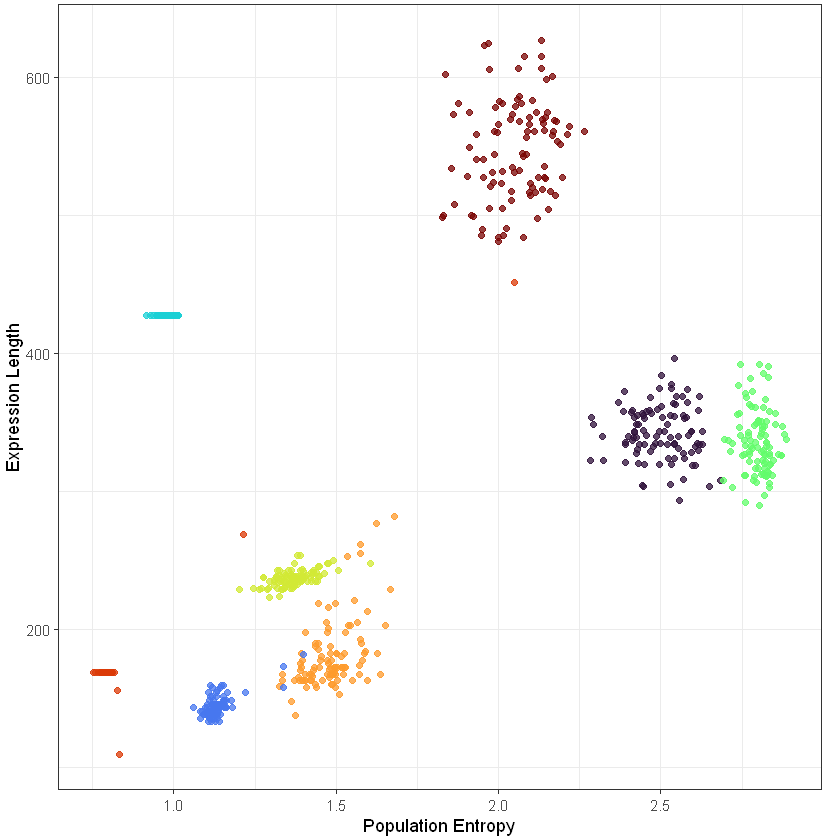

In [17]:
scientific_10 = function(x) {
  ifelse(
    x==0, "0",
    parse(text = sub("e[+]?", " %*% 10^", scales::scientific_format()(x)))
  )
} 

unique.runs <- sample(unique(all.df$savename), 8)
ave.df <- all.df %>% 
            filter(time_step >  502) %>% 
            group_by(savename) %>%
            summarise(pop_entropy = mean(pop_entropy), med_expr_len = mean(med_expr_len))



p <- ggplot(all.df %>% filter(time_step >  502, savename %in% unique.runs) ) +
        # geom_point(aes(x = pop_entropy, y=med_expr_len),data = ave.df,
        #             color = "black",
        #             shape = 3,
        #             alpha = 0.5) + 
        geom_point(aes(x = pop_entropy, y=med_expr_len,
                      color=as.factor(savename),),
                      alpha = 0.75) + 
        # facet_wrap(~savename) +
        scale_color_viridis_d(option = "H") +
        # scale_shape_manual(values = sample(1:24, 8, replace = FALSE)) + 
        labs(x = "Population Entropy", y ="Expression Length") + 
        theme_bw(base_size = 11) + 
        theme(legend.position = "right",plot.margin = margin(1, 4, 1, 1, "mm")) +
        # guides(color=guide_legend(nrow=2, byrow= TRUE)) +
        # scale_x_continuous(expand = c(0.01,0.01), label=scientific_10) +
        # scale_y_continuous(expand = c(0,0,0,50))
        theme(legend.position = "none")
        # gghighlight(max(count) > 300) +
        # scale_y_log10()
p
ggsave("L0_Phase_space_v1.svg", p, width = 183*1/2, height = 247/4, units = "mm")

In [19]:
last_section <- all.df %>% filter(time_step > 501)
last_ave <- last_section %>%
        group_by(savename) %>%
        summarize(med_count = median(count),
                    med_I_count = median(I_count))

Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 39 rows containing missing values (`geom_bar()`)."
Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 39 rows containing missing values (`geom_bar()`)."


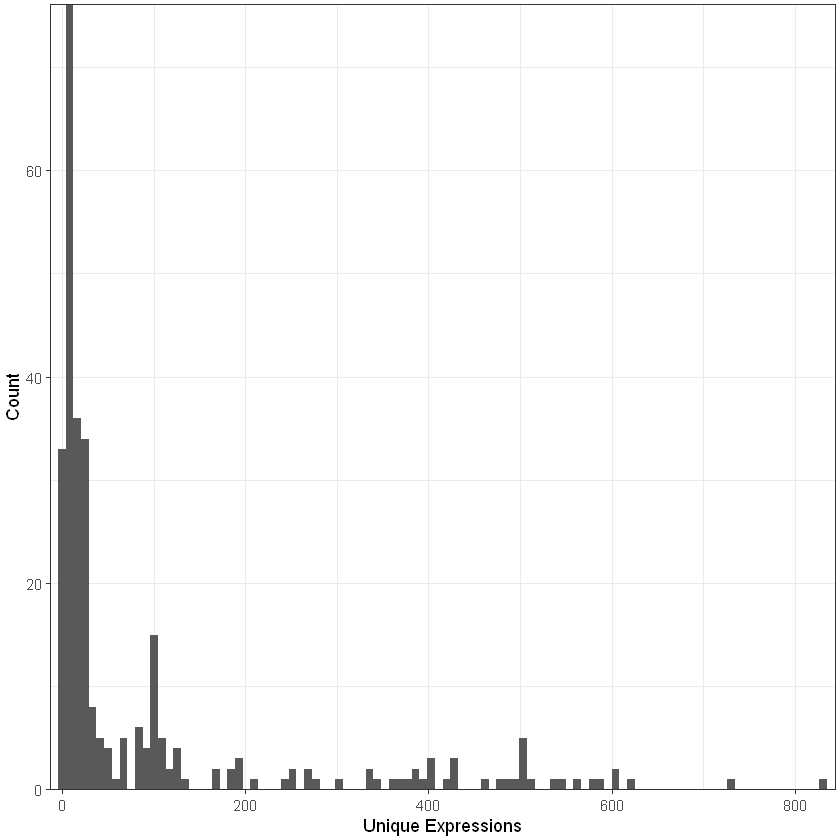

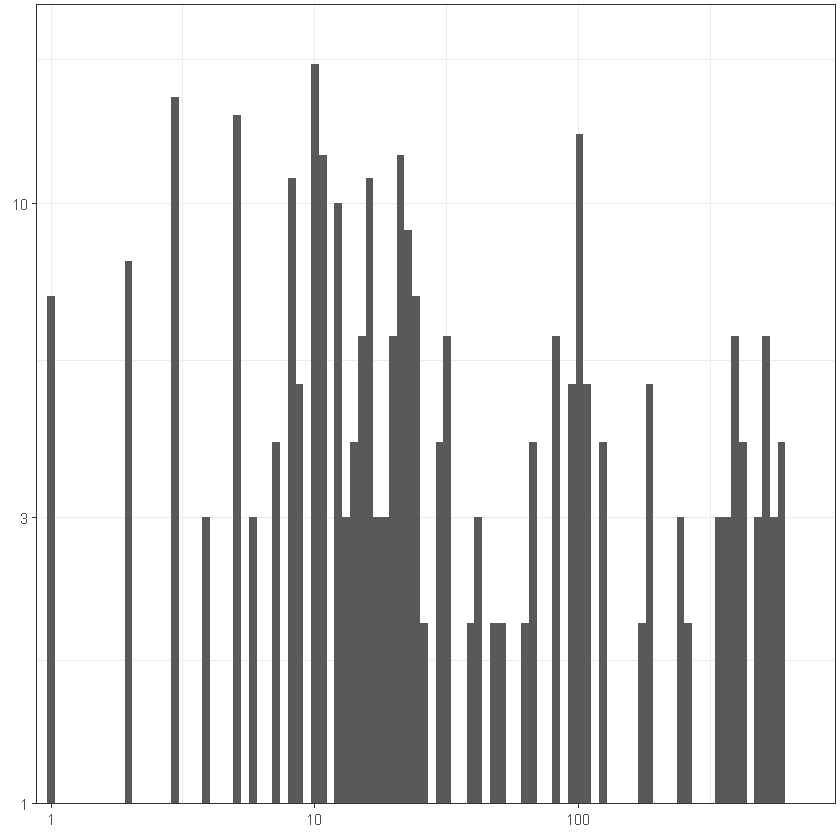

In [20]:
p <- ggplot(last_ave) + 
        geom_histogram((aes(x= med_count)), bins = 100) + 
        # geom_freqpoly((aes(x = med_count)), bins =100) + 
        labs(x = "Unique Expressions", y = "Count") +
        theme_bw(base_size = 11) +
        theme(legend.position = "right",plot.margin = margin(1, 1, 1, 1, "mm")) +
        scale_x_continuous(expand = c(0.01,0.01)) +
        scale_y_continuous(expand = c(0,0,0,0.1))
ggsave("L0_count_histogram_v2.svg", p, width = 183*1/2, height = 247/4, units = "mm")
p
q <- ggplot(last_ave) + 
        geom_histogram((aes(x= med_count)), bins = 100) + 
        # geom_freqpoly((aes(x = med_count)), bins =100) + 
        labs(x = element_blank(), y = element_blank()) +
        theme_bw(base_size = 11) +
        theme(legend.position = "right", plot.margin = margin(1, 1, 1, 1, "mm")) +
        scale_x_log10(expand = c(0.01,0.01)) +
        scale_y_log10(expand = c(0,0,0,0.1))
ggsave("L0_count_histogram_inset_v2.svg", q, width = (0.6)*183*1/2, height = (0.6)*247/4, units = "mm")
q

[1] "run_data/-4368936838771089273.json"

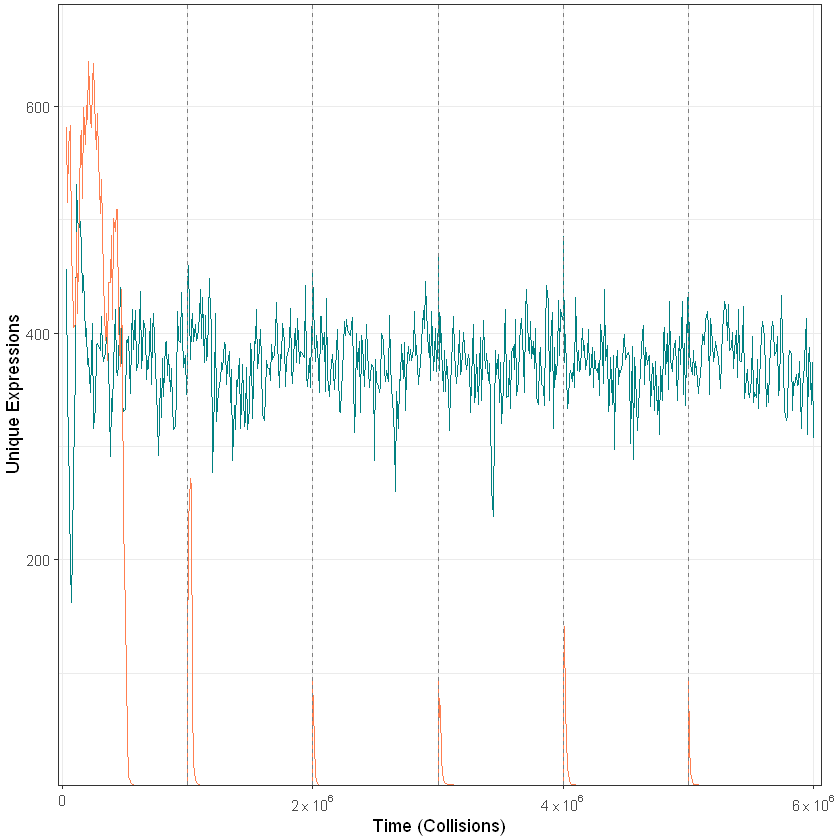

In [36]:

expected_run = last_ave %>% 
                filter(med_count == 1) %>%
                sample_n(1)%>%
                select(savename) %>%
                unlist(use.names=FALSE)

interesting_run = last_ave %>% 
                filter(med_count > 50) %>%
                sample_n(1) %>%
                select(savename) %>%
                unlist(use.names=FALSE)
interesting_run

plotting_runs = c(expected_run, interesting_run)
p <- ggplot(all.df %>% filter(time_step > 2, savename %in% plotting_runs)) +
        geom_line(aes(x = 10000*time_step, y=count,
                      group = savename,
                      color= savename),
                      ) + 
        labs(x = "Time (Collisions)", y ="Unique Expressions", color = element_blank()) + 
        theme_bw(base_size = 11) + 
        theme(legend.position = "none",plot.margin = margin(1, 4, 1, 1, "mm")) +
        guides(color=guide_legend(nrow=2, byrow= TRUE)) +
        scale_x_continuous(expand = c(0.01,0.01), label=scientific_10) +
        scale_y_continuous(expand = c(0,0,0,50)) + 
        geom_vline(xintercept = 1000000*seq(5), linetype = "dashed", color = "grey50") +
        scale_color_manual(values = c("#008080", "#FF7F50"))
        # theme(legend.position = "none") +
        # gghighlight(max(count) > 300) +
        # scale_y_log10()
p


In [37]:
ggsave("L0_exmplar_unique_expressions_v2.svg", p, width = 183*1/2, height = 247/4, units = "mm")

In [51]:
zoom.df.savenames <- all.df %>%
            group_by(savename) %>%
            summarise(med_count = median(count)) %>%
            filter(med_count < 50)
zoom.df <- all.df %>% filter(savename %in% zoom.df.savenames$savename)


p <- ggplot(all.df %>% filter(time_step > 550), 
            aes(x = count, fill =as.factor(max_depth))) + 
        geom_histogram(position= "dodge2") +
        facet_wrap(~max_depth) + 
        # geom_line(aes(x = 10000*time_step, y=count,
        #               group = savename,
        #               color=as.factor(max_depth)),
        #               alpha = 0.75) + 
        # labs(x = "Collision", y ="Unique Expressions", color = "Max Depth") + 
        # theme_bw(base_size = 11) + 
        theme(legend.position = "right",plot.margin = margin(1, 4, 1, 1, "mm")) +
        guides(color=guide_legend(nrow=2, byrow= TRUE)) 
        # scale_x_continuous(expand = c(0.01,0.01), label=scientific_10) +
        # scale_y_continuous(expand = c(0,0,0,3)) + 
        # coord_cartesian(ylim = c(0,50))
        # # theme(legend.position = "none") +
        # gghighlight(max(count) > 300) +
        # scale_y_log10()
# ggsave("L0_unique_expressions_zoom_v1.svg", p, width = 183*1/2, height = 89, units = "mm")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


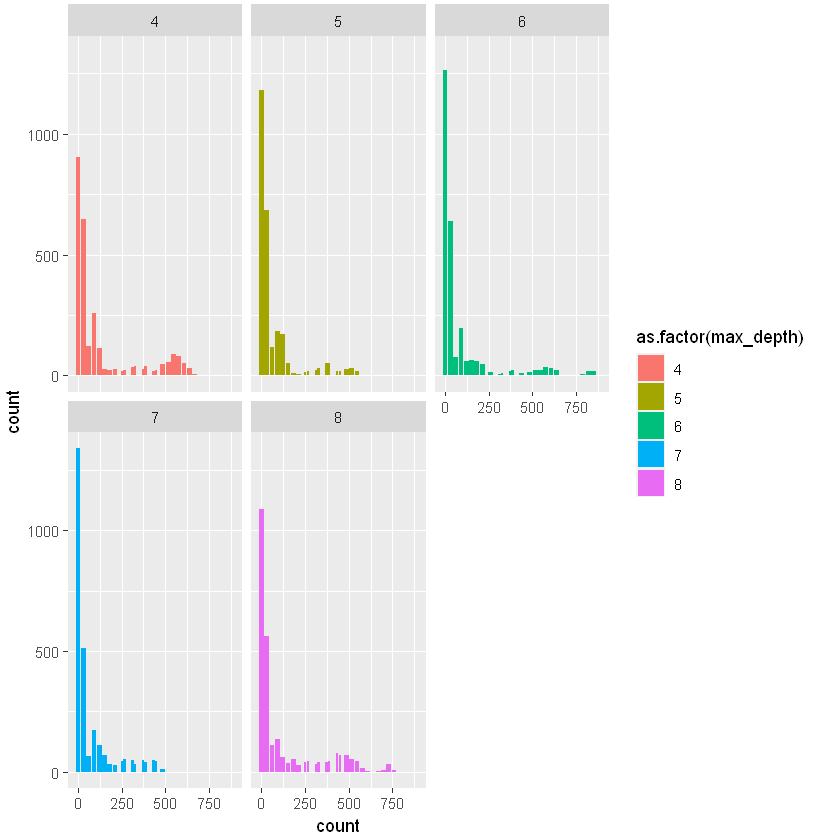

In [52]:
p